# [CM1] Data Pre-processing and Preparation

Importing all necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
import scipy

In [2]:
df = pd.read_csv('dkmacovid_train.csv')

In [3]:
df.shape

(1380, 17)

In [4]:
df.head(47)

,Day,State ID,State,Lat,Long_,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,Resident Population 2020 Census,Population Density 2020 Census,Density Rank 2020 Census,SexRatio,Confirmed,Deaths,Recovered
0,2,1,Alabama,32.3182,-86.9023,162449,7535.061394,1891468,1.318688,38576.31315,"5,024,279",99.2,29,94,True,False,False
1,2,2,Alaska,61.3707,-152.4044,40421,6534.252848,1290349,0.449781,176386.82510,"733,391",1.3,52,109,True,True,False
2,2,3,Arizona,33.7298,-111.4312,452222,7407.212013,5218721,1.680608,39916.14181,"7,151,502",62.9,35,99,True,True,True
3,2,4,Arkansas,34.9697,-92.3731,24012,7669.219075,2079788,1.611203,68917.26567,"3,011,524",57.9,36,96,True,True,True
4,2,5,California,36.1162,-119.6816,2362015,6045.109130,33391442,1.111215,84509.14544,"39,538,223",253.7,13,99,True,True,False
5,2,6,Colorado,39.0598,-105.3111,316043,5889.695239,4474747,1.448233,77703.63149,"5,773,714",55.7,39,101,True,True,True
6,2,7,Connecticut,41.5978,-72.7554,174221,5332.530032,4383361,3.207974,122945.53010,"3,605,944",744.7,6,95,True,True,False
7,2,8,Delaware,39.3185,-75.5071,39092,6045.920778,991318,1.579671,101802.69550,"989,948",508,8,94,True,True,False
8,2,9,District of Columbia,38.8974,-77.0268,7715,4181.231571,911378,2.683927,129136.27930,"689,545","11,280.00",1,96,True,True,True
9,2,10,Florida,27.7663,-81.6868,1332943,6308.080782,15950750,1.615697,74266.43692,"21,538,187",401.4,10,96,True,True,False


## We can see that states with State Id 14, 16, 43, 44 and 48 are missing in the data. That's why the total count of states in the data is 46. 

In [5]:
df.tail(5)

,Day,State ID,State,Lat,Long_,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,Resident Population 2020 Census,Population Density 2020 Census,Density Rank 2020 Census,SexRatio,Confirmed,Deaths,Recovered
1375,31,46,Vermont,44.0459,-72.7107,3537,1917.501751,897351,1.454242,143808.78510,"643,077",69.8,33,97,True,True,True
1376,31,47,Virginia,37.7693,-78.1700,457993,5913.864172,5234155,1.280560,61322.04732,"8,631,393",218.6,16,97,True,True,True
1377,31,49,West Virginia,38.4912,-80.9545,21195,6751.734093,1945579,1.672713,108561.35130,"1,793,716",74.6,31,98,True,True,True
1378,31,50,Wisconsin,44.2685,-89.6165,68537,10169.973590,6177575,1.086567,106099.52810,"5,893,718",108.8,27,99,True,True,True
1379,31,51,Wyoming,42.7560,-107.3025,1313,8969.536543,634985,1.148097,109714.92450,"576,851",5.9,51,104,True,False,True


In [6]:
df.describe(include = 'all')

,Day,State ID,State,Lat,Long_,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,Resident Population 2020 Census,Population Density 2020 Census,Density Rank 2020 Census,SexRatio,Confirmed,Deaths,Recovered
count,1380.000000,1380.000000,1380,1380.000000,1380.000000,1.380000e+03,1380.000000,1.380000e+03,1380.000000,1380.000000,1380,1380,1380.000000,1380.000000,1380,1380,1380
unique,NaN,NaN,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46,46,NaN,NaN,2,2,2
top,NaN,NaN,South Carolina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"5,773,714",1.3,NaN,NaN,True,True,True
freq,NaN,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,30,NaN,NaN,1329,1244,864
mean,16.500000,25.239130,NaN,39.470717,-92.879928,2.610390e+05,7203.192905,5.271097e+06,1.631757,91763.237514,NaN,NaN,27.173913,97.760870,NaN,NaN,NaN
std,8.658579,14.513405,NaN,6.070494,19.632514,4.914059e+05,2305.025102,6.991478e+06,0.656702,40858.185997,NaN,NaN,15.378197,3.219219,NaN,NaN,NaN
min,2.000000,1.000000,NaN,21.094300,-157.498300,9.550000e+02,1232.233261,3.739460e+05,0.439598,30524.071590,NaN,NaN,1.000000,94.000000,NaN,NaN,NaN
25%,9.000000,12.000000,NaN,35.630100,-105.311100,2.731600e+04,6042.134459,1.310515e+06,1.246993,67457.197525,NaN,NaN,13.000000,95.000000,NaN,NaN,NaN
50%,16.500000,25.500000,NaN,39.583950,-88.259400,1.005915e+05,7453.675956,2.919566e+06,1.499993,85438.613770,NaN,NaN,28.500000,97.000000,NaN,NaN,NaN
75%,24.000000,37.000000,NaN,43.326600,-77.209800,2.592418e+05,8621.924085,6.093790e+06,1.817013,104509.453475,NaN,NaN,41.000000,99.000000,NaN,NaN,NaN


### As the columns 'Resident Population 2020 Census' and 'Population Density 2020 Census' have commas in the data , we will be removing it for computation purposes. 

In [7]:
df['Resident Population 2020 Census'] = df['Resident Population 2020 Census'].str.replace(',','').astype(int)
df['Population Density 2020 Census'] = df['Population Density 2020 Census'].str.replace(',','').astype(float)

In [8]:
for i in set(df.loc[:,"State"]):
    lat = set(df[df.loc[:,"State"]==i].loc[:,"Lat"])
    lon = set(df[df.loc[:,"State"]==i].loc[:,"Long_"])
    print(i,"\t",lat,lon)
print("No of sets ",len(set(df.loc[:,"State"])))

New Mexico 	 {34.8405} {-106.2485}
Massachusetts 	 {42.2302} {-71.5301}
Oklahoma 	 {35.5653} {-96.9289}
Michigan 	 {43.3266} {-84.5361}
Pennsylvania 	 {40.5908} {-77.2098}
Wisconsin 	 {44.2685} {-89.6165}
Indiana 	 {39.8494} {-86.2583}
Mississippi 	 {32.7416} {-89.6787}
Virginia 	 {37.7693} {-78.17}
Alaska 	 {61.3707} {-152.4044}
New Jersey 	 {40.2989} {-74.521}
Ohio 	 {40.3888} {-82.7649}
Minnesota 	 {45.6945} {-93.9002}
Oregon 	 {44.572} {-122.0709}
California 	 {36.1162} {-119.6816}
Louisiana 	 {31.1695} {-91.8678}
Arkansas 	 {34.9697} {-92.3731}
Vermont 	 {44.0459} {-72.7107}
Delaware 	 {39.3185} {-75.5071}
Colorado 	 {39.0598} {-105.3111}
Alabama 	 {32.3182} {-86.9023}
New Hampshire 	 {43.4525} {-71.5639}
Georgia 	 {33.0406} {-83.6431}
Nebraska 	 {41.1254} {-98.2681}
Hawaii 	 {21.0943} {-157.4983}
Connecticut 	 {41.5978} {-72.7554}
Florida 	 {27.7663} {-81.6868}
Kentucky 	 {37.6681} {-84.6701}
West Virginia 	 {38.4912} {-80.9545}
Kansas 	 {38.5266} {-96.7265}
Nevada 	 {38.3135} {-

### From the above, we can say that every State corresponds to a unique set of co-ordinates represented by Latitude and Longitude.  We'll keep the Lat and Long for better data understanding.

#### 1. Check for Null values

In [9]:
df.isna().sum()

Day                                0
State ID                           0
State                              0
Lat                                0
Long_                              0
Active                             0
Incident_Rate                      0
Total_Test_Results                 0
Case_Fatality_Ratio                0
Testing_Rate                       0
Resident Population 2020 Census    0
Population Density 2020 Census     0
Density Rank 2020 Census           0
SexRatio                           0
Confirmed                          0
Deaths                             0
Recovered                          0
dtype: int64

<b> No Null values in the dataset as mentioned in the question </b>

#### 2. Checking for negative values

In [10]:
(df.iloc[:,3:-3]<0).sum()

Lat                                   0
Long_                              1380
Active                                0
Incident_Rate                         0
Total_Test_Results                    0
Case_Fatality_Ratio                   0
Testing_Rate                          0
Resident Population 2020 Census       0
Population Density 2020 Census        0
Density Rank 2020 Census              0
SexRatio                              0
dtype: int64

<b> No negative values in the dataset. </b>

## 3. Checking Outliers and Removing them

<AxesSubplot:xlabel='Case_Fatality_Ratio'>

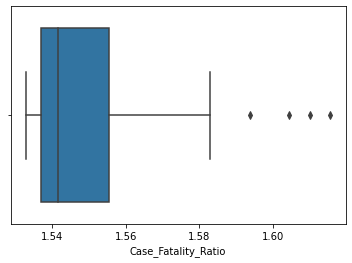

In [11]:
df_gstate = df.groupby('State')
z = df_gstate.get_group('Florida')['Case_Fatality_Ratio']
sns.boxplot(x = z)

In [12]:
#The outliers are checked and removed by grouping the dataset according to the State
for key,value in df_gstate:
    groups = df_gstate.get_group(key)
    temp = groups.iloc[:,5:10]
    for columns in temp:
        Q1 = np.percentile(temp[columns],25)
        Q3 = np.percentile(temp[columns],75)
        IQR = Q3 - Q1
        right_limit = Q3 + 1.5*IQR
        left_limit = Q1 - 1.5*IQR
        outlier_right_index = groups[groups[columns] > right_limit][columns].index
        outlier_left_index = groups[groups[columns] < left_limit][columns].index
        n_outliers = len(outlier_right_index) + len(outlier_left_index)
        if(n_outliers > 0):
            print(key,columns,n_outliers)
            df.loc[outlier_right_index,columns] = right_limit
            df.loc[outlier_left_index,columns] = left_limit

Florida Case_Fatality_Ratio 4
Hawaii Case_Fatality_Ratio 6
Indiana Case_Fatality_Ratio 1
Maine Case_Fatality_Ratio 1
Mississippi Case_Fatality_Ratio 1
Montana Active 3
Montana Case_Fatality_Ratio 3
Nebraska Active 1
Nebraska Case_Fatality_Ratio 1
Ohio Active 2
Utah Active 3


<AxesSubplot:xlabel='Case_Fatality_Ratio'>

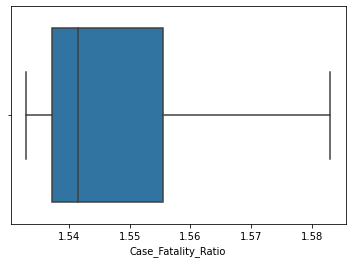

In [13]:
z = df_gstate.get_group('Florida')['Case_Fatality_Ratio']
sns.boxplot(x = z)

## What do you do with ”Day”, ”State” and ”State ID”?

In [14]:
print(df.State.nunique())
print(df['State ID'].nunique())
print(df.Day.nunique())

46
46
30


<b> The dataset contains data for day 2 to 31 total 30 days of covid data for 46 unique states. </b>

## As State ID and State both are giving a unique identity to the dataset we can remove state column.

In [15]:
#dropping State Id Column
df = df.drop(columns=['State'])

In [16]:
df.columns

Index(['Day', 'State ID', 'Lat', 'Long_', 'Active', 'Incident_Rate',
       'Total_Test_Results', 'Case_Fatality_Ratio', 'Testing_Rate',
       'Resident Population 2020 Census', 'Population Density 2020 Census',
       'Density Rank 2020 Census', 'SexRatio', 'Confirmed', 'Deaths',
       'Recovered'],
      dtype='object')

## Normalization

In [17]:
normalization = df[['Lat','Long_','Active','Incident_Rate','Total_Test_Results','Case_Fatality_Ratio',
            'Testing_Rate','Resident Population 2020 Census','Population Density 2020 Census',
            'Density Rank 2020 Census','SexRatio']]
normalization.dtypes

Lat                                float64
Long_                              float64
Active                             float64
Incident_Rate                      float64
Total_Test_Results                   int64
Case_Fatality_Ratio                float64
Testing_Rate                       float64
Resident Population 2020 Census      int32
Population Density 2020 Census     float64
Density Rank 2020 Census             int64
SexRatio                             int64
dtype: object

In [18]:
# Z-score normalization
normalization = (normalization - normalization.mean()) / normalization.std()

In [19]:
df[['Lat','Long_','Active','Incident_Rate','Total_Test_Results','Case_Fatality_Ratio',
            'Testing_Rate','Resident Population 2020 Census','Population Density 2020 Census',
            'Density Rank 2020 Census','SexRatio']] = normalization
df

,Day,State ID,Lat,Long_,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,Resident Population 2020 Census,Population Density 2020 Census,Density Rank 2020 Census,SexRatio,Confirmed,Deaths,Recovered
0,2,1,-1.178243,0.304476,-0.200641,0.143976,-0.483393,-0.475230,-1.301745,-0.128579,-0.217013,0.118745,-1.168255,True,False,False
1,2,2,3.607611,-3.031933,-0.448967,-0.290209,-0.569371,-1.797949,2.071154,-0.754174,-0.276752,1.614369,3.491260,True,True,False
2,2,3,-0.945708,-0.944926,0.389043,0.088511,-0.007491,0.075713,-1.268952,0.181561,-0.239163,0.508908,0.384916,True,True,True
3,2,4,-0.741458,0.025816,-0.482359,0.202178,-0.456457,-0.029941,-0.559153,-0.422031,-0.242214,0.573935,-0.546987,True,True,True
4,2,5,-0.552594,-1.365168,4.275448,-0.502417,4.022089,-0.791062,-0.177543,4.903416,-0.122735,-0.921689,0.384916,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,31,46,0.753675,1.027338,-0.524025,-2.293117,-0.625582,-0.268880,1.273810,-0.767341,-0.234953,0.378854,-0.236352,True,True,True
1376,31,47,-0.280277,0.749264,0.400787,-0.559356,-0.005284,-0.533271,-0.745045,0.397324,-0.144153,-0.726607,-0.236352,True,True,True
1377,31,49,-0.161357,0.607433,-0.488091,-0.195859,-0.475653,0.063695,0.411132,-0.599582,-0.232024,0.248799,0.074282,True,True,True
1378,31,50,0.790345,0.166226,-0.391751,1.287093,0.129655,-0.828583,0.350879,-0.001818,-0.211155,-0.011309,0.384916,True,True,True


In [20]:
df.to_csv("cleaned_normalized_coviddata.csv",index = False)

# Summary Report

#### 1) The dataset that is imported goes though a series of preprocessing steps. It is initially checked for NAN and negative values, there were no NAN values in the dataset. 
#### 2) The 'Resident Population 2020 Census' and 'Population Density 2020 Census' were of type object because there were commas between numbers and thus the data was stored as string type. The commas were removed and these columns were converted to numerical datatype. 
#### 3) The datset is then checked for outliers. The outliers were to be considered based on grouping the dataset by 'State'. This resulted in 25 outliers which were replaced by their upper and lower limit values. 
#### 4) The state and stateId represented the same information so the 'State' column was dropped. We have kept the 'Day' and 'State ID' so that the data may be grouped according to state for any future reference in the following CM's. However, these values will not be used for calculation purposes.
#### 5) We used z-score normalization since the columns would be normally distributed with a specified range of values and most of the classifiers calculate the distance between points for classification. Min Max scaler is not used as presence of outlier might affect its values and since the data is generated over a specific population, there might be chances of outliers.